<a id="1"></a>
<p style="background-color:#5DADE2;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
STROKE RISK PREDICTION
</p>

<div style="width:100vw; height:100vh; margin:0; padding:0; overflow:hidden;">
    <img src="Stroke.gif" style="width:100%; height:100%; object-fit:cover;">
</div>

<p>In this project, we aim to predict the risk of stroke for patients using their medical and demographic data. Accurate prediction helps in early detection and prevention of stroke by identifying high-risk individuals. Various machine learning models will be applied, and visualizations will be used to understand data patterns and feature importance.</p>

<a id="toc"></a>
<p style="background-color:#5DADE2;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
TABLE OF CONTENTS
</p>

<ul>
<li>1. IMPORTING LIBRARIES</li>
<li>2. LOADING DATA</li>
<li>3. DATA CLEANING</li>
<li>4. DATA PREPROCESSING</li>
<li>5. EXPLORATORY DATA ANALYSIS (EDA)</li>
<li>6. MODELING</li>
<li>7. MODEL EVALUATION</li>
<li>8. VISUALIZATIONS</li>
<li>9. CONCLUSION</li>
<li>10. END</li>
</ul>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import math
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable


from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#metrics
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score, RocCurveDisplay,accuracy_score



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DEPI/Project/stroke_risk_dataset_custom_nulls.csv")
df

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,54,58.0,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,49,40.5,0
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,62,52.0,1
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,48,60.0,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,1,61,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,1,18,30.0,0
69996,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0,24,33.0,0
69997,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,49,45.5,0
69998,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,45,48.5,0


In [ ]:
df.isnull().sum()

,0
Chest Pain,90
Shortness of Breath,54
Irregular Heartbeat,66
Fatigue & Weakness,80
Dizziness,75
Swelling (Edema),92
Pain in Neck/Jaw/Shoulder/Back,56
Excessive Sweating,56
Persistent Cough,85
Nausea/Vomiting,66


In [ ]:
numeric_cols_possible = ["Age", "Stroke Risk (%)"]

for col in numeric_cols_possible:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


binary_cols = [c for c in num_cols if c not in ["Age", "Stroke Risk (%)"]]


continuous_cols = [c for c in num_cols if c in ["Age", "Stroke Risk (%)"]]


cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()


if binary_cols:
    most_freq_imputer = SimpleImputer(strategy='most_frequent')
    df[binary_cols] = most_freq_imputer.fit_transform(df[binary_cols])


if continuous_cols:
    knn_imputer = KNNImputer(n_neighbors=5)
    df[continuous_cols] = knn_imputer.fit_transform(df[continuous_cols])


if cat_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


print("Total NaNs after imputation:", df.isna().sum().sum())
print(df.isna().sum())


df.to_csv("stroke_risk_dataset_cleaned_medical.csv", index=False)
print("Saved cleaned file as: stroke_risk_dataset_cleaned_medical.csv")

Total NaNs after imputation: 0
Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64
Saved cleaned file as: stroke_risk_dataset_cleaned_medical.csv


In [ ]:
df.isnull().sum()

,0
Chest Pain,0
Shortness of Breath,0
Irregular Heartbeat,0
Fatigue & Weakness,0
Dizziness,0
Swelling (Edema),0
Pain in Neck/Jaw/Shoulder/Back,0
Excessive Sweating,0
Persistent Cough,0
Nausea/Vomiting,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  float64
 1   Shortness of Breath             70000 non-null  float64
 2   Irregular Heartbeat             70000 non-null  float64
 3   Fatigue & Weakness              70000 non-null  float64
 4   Dizziness                       70000 non-null  float64
 5   Swelling (Edema)                70000 non-null  float64
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  float64
 7   Excessive Sweating              70000 non-null  float64
 8   Persistent Cough                70000 non-null  float64
 9   Nausea/Vomiting                 70000 non-null  float64
 10  High Blood Pressure             70000 non-null  float64
 11  Chest Discomfort (Activity)     70000 non-null  float64
 12  Cold Hands/Feet                 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chest Pain,70000.0,0.502529,0.499997,0.0,0.0,1.0,1.0,1.0
Shortness of Breath,70000.0,0.496014,0.499988,0.0,0.0,0.0,1.0,1.0
Irregular Heartbeat,70000.0,0.498529,0.500001,0.0,0.0,0.0,1.0,1.0
Fatigue & Weakness,70000.0,0.500629,0.500003,0.0,0.0,1.0,1.0,1.0
Dizziness,70000.0,0.503471,0.499992,0.0,0.0,1.0,1.0,1.0
Swelling (Edema),70000.0,0.501229,0.500002,0.0,0.0,1.0,1.0,1.0
Pain in Neck/Jaw/Shoulder/Back,70000.0,0.498800,0.500002,0.0,0.0,0.0,1.0,1.0
Excessive Sweating,70000.0,0.504029,0.499987,0.0,0.0,1.0,1.0,1.0
Persistent Cough,70000.0,0.501329,0.500002,0.0,0.0,1.0,1.0,1.0
Nausea/Vomiting,70000.0,0.502429,0.499998,0.0,0.0,1.0,1.0,1.0


In [ ]:
df["At Risk (Binary)"].value_counts()/len(df)

,count
At Risk (Binary),
1.0,0.6492
0.0,0.3508


<a id="1"></a>
<p style="background-color:#5DADE2;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
DATA VISUALIZATION
</p>


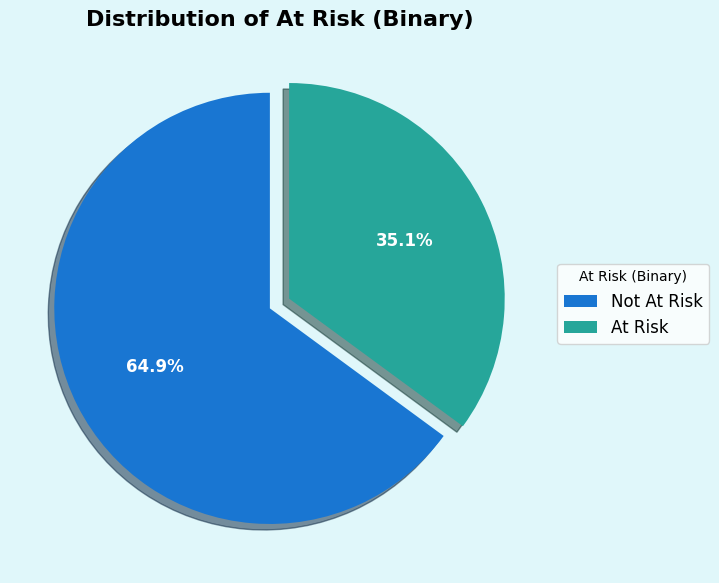

In [ ]:
import matplotlib.pyplot as plt

colors = ['#1976D2', '#26A69A']
explode = (0.05, 0.05)

counts = df["At Risk (Binary)"].value_counts()
labels = counts.index

plt.figure(figsize=(7,7))

plt.gca().set_facecolor("#E0F7FA")
plt.gcf().set_facecolor("#E0F7FA")

wedges, texts, autotexts = plt.pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)

plt.legend(
    wedges,
    ['Not At Risk', 'At Risk'],
    title="At Risk (Binary)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.title('Distribution of At Risk (Binary)', fontsize=16, weight='bold')
plt.show()


In [ ]:
df.duplicated().sum()/len(df)
df.drop_duplicates(inplace=True)
df

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,54.0,58.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,49.0,40.5,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0,52.0,1.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,48.0,60.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,61.0,56.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,18.0,30.0,0.0
69996,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,24.0,33.0,0.0
69997,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,45.5,0.0
69998,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,45.0,48.5,0.0


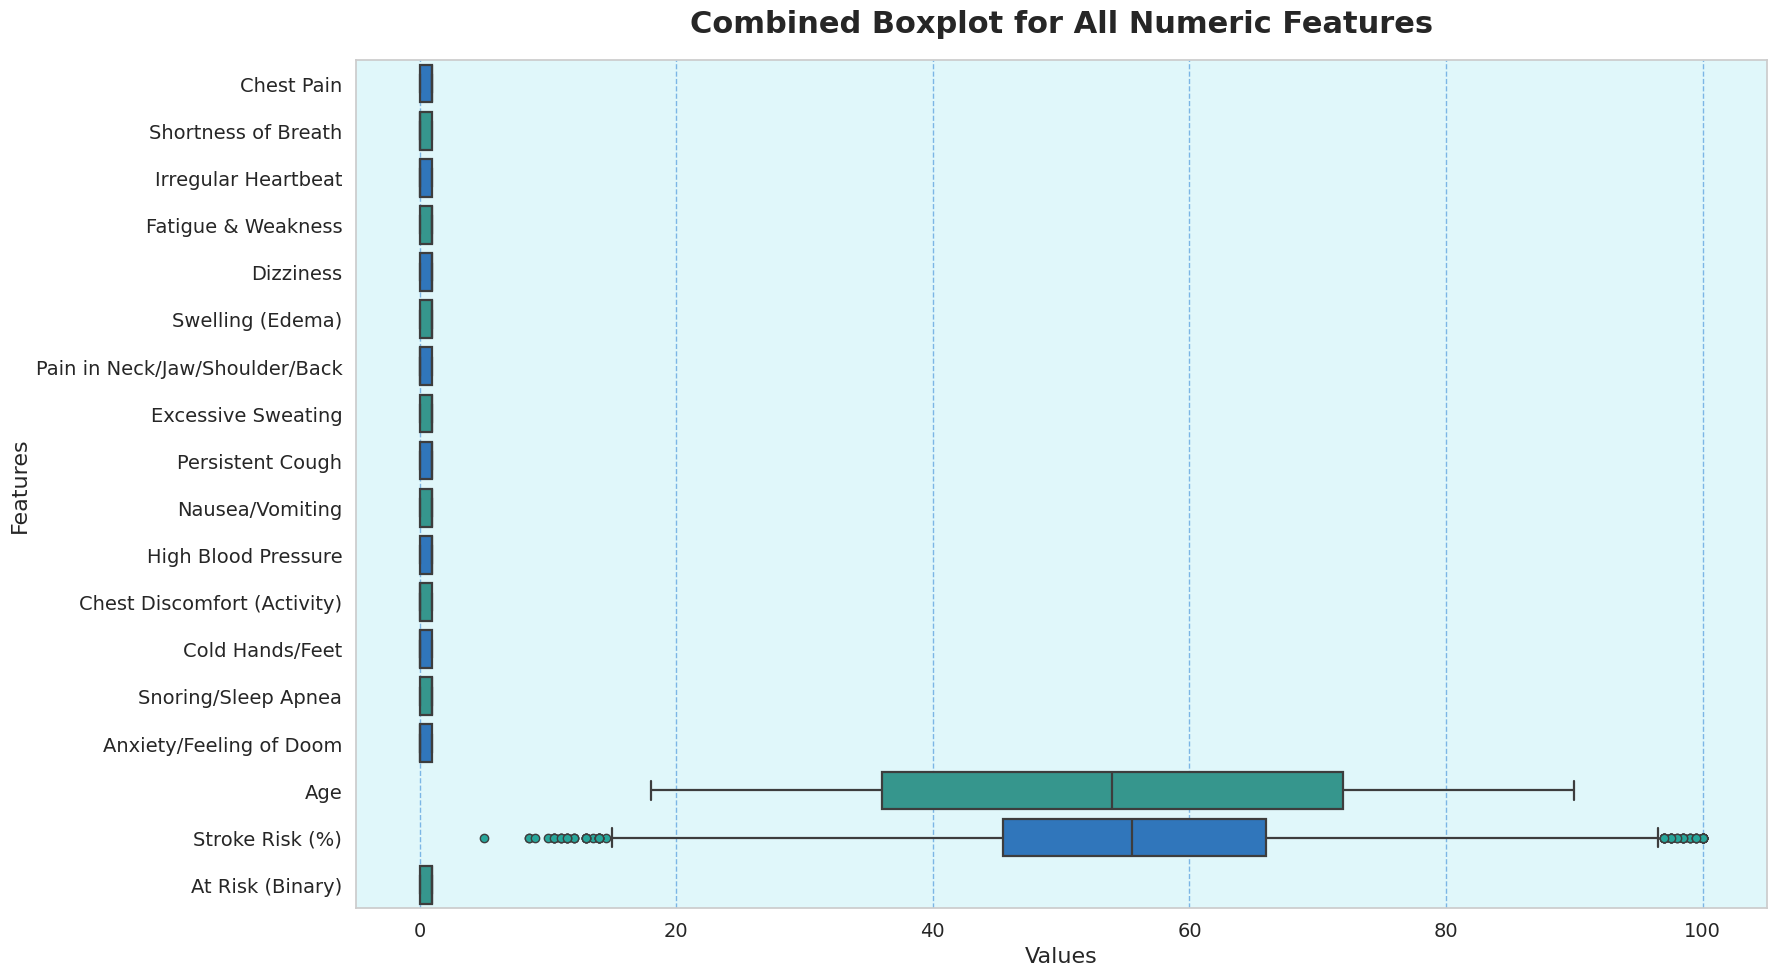

Button(description='Show All Separate Plots', layout=Layout(height='40px', width='30%'), style=ButtonStyle(but…

Button(description='Show Only Outliers', layout=Layout(height='40px', width='30%'), style=ButtonStyle(button_c…

Output()

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

main_palette = ['#1976D2', '#26A69A']
palette = [main_palette[i % 2] for i in range(len(numeric_cols))]

out_separate = widgets.Output()

fig, ax = plt.subplots(figsize=(18, 10))
ax.set_facecolor('#E0F7FA')

sns.boxplot(
    data=df[numeric_cols],
    orient="h",
    palette=palette,
    flierprops=dict(marker='o', markerfacecolor='#26A69A', markersize=6, linestyle='none'),
    linewidth=1.6,
    ax=ax
)

ax.set_title("Combined Boxplot for All Numeric Features", fontsize=22, weight='bold', pad=20)
ax.set_xlabel("Values", fontsize=16)
ax.set_ylabel("Features", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.5, color='#1976D2')

plt.tight_layout()
plt.show()


def has_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).any()


def show_separate(columns, title):
    with out_separate:
        out_separate.clear_output(wait=True)
        if isinstance(columns, pd.Index):
            columns = list(columns)
        if len(columns) == 0:
            print("No columns to display.")
            return

        n = len(columns)
        cols = 3
        rows = math.ceil(n / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
        axes = axes.flatten()

        for i, col in enumerate(columns):
            axes[i].set_facecolor('#E0F7FA')
            sns.boxplot(
                x=df[col],
                color=main_palette[i % 2],
                flierprops=dict(marker='o', markerfacecolor='#26A69A', markersize=5, linestyle='none'),
                ax=axes[i]
            )
            axes[i].set_title(col, fontsize=14, weight='bold')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', labelsize=12)
            axes[i].tick_params(axis='y', labelsize=12)

        for j in range(len(columns), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()


button_all = widgets.Button(
    description="Show All Separate Plots",
    layout=widgets.Layout(width='30%', height='40px'),
    style={'button_color': '#1976D2', 'font_weight': 'bold', 'font_size': '14px', 'text_color': 'white'}
)

button_outliers = widgets.Button(
    description="Show Only Outliers",
    layout=widgets.Layout(width='30%', height='40px'),
    style={'button_color': '#26A69A', 'font_weight': 'bold', 'font_size': '14px', 'text_color': 'white'}
)

def on_show_all(button):
    show_separate(numeric_cols, "All Separate Plots")

def on_show_outliers(button):
    cols_with_outliers = [col for col in numeric_cols if has_outliers(col)]
    show_separate(cols_with_outliers, "Separate Plots with Outliers")

button_all.on_click(on_show_all)
button_outliers.on_click(on_show_outliers)

display(button_all, button_outliers, out_separate)


/tmp/ipython-input-3607386638.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


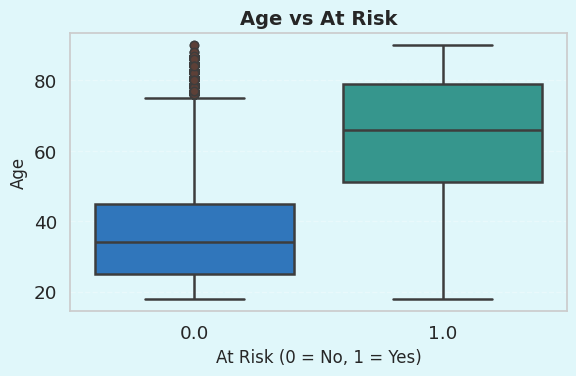

/tmp/ipython-input-3607386638.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


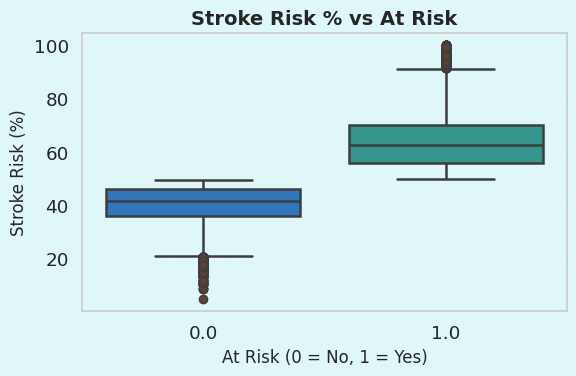

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'At Risk (Binary)'
palette = ['#1976D2', '#26A69A']
background = "#E0F7FA"

plt.figure(figsize=(6, 4), facecolor=background)
ax = plt.gca()
ax.set_facecolor(background)

sns.boxplot(
    x=df[target],
    y=df['Age'],
    palette=palette,
    flierprops=dict(marker='o', markerfacecolor='#5D4037', markersize=6, linestyle='none'),
    linewidth=1.8
)

plt.title("Age vs At Risk", fontsize=14, weight='bold')
plt.xlabel("At Risk (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4), facecolor=background)
ax = plt.gca()
ax.set_facecolor(background)

sns.boxplot(
    x=df[target],
    y=df['Stroke Risk (%)'],
    palette=palette,
    flierprops=dict(marker='o', markerfacecolor='#5D4037', markersize=6, linestyle='none'),
    linewidth=1.8
)

plt.title("Stroke Risk % vs At Risk", fontsize=14, weight='bold')
plt.xlabel("At Risk (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Stroke Risk (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')
plt.tight_layout()
plt.show()


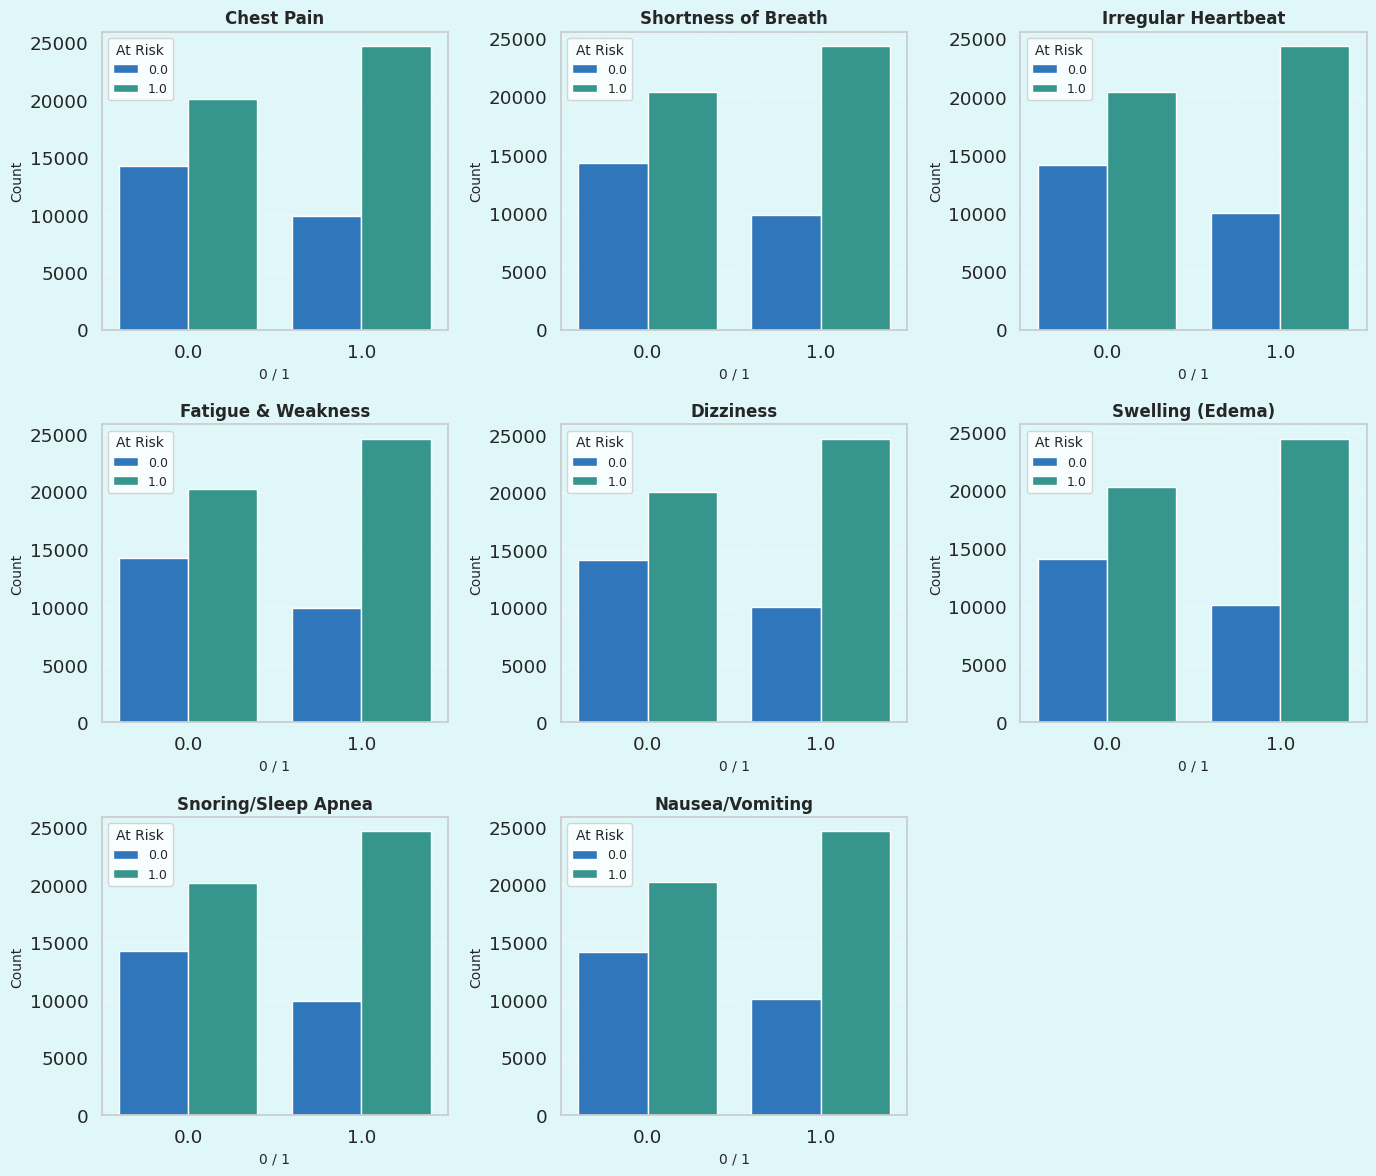

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

symptom_cols = [
    'Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
    'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
    'Snoring/Sleep Apnea', 'Nausea/Vomiting'
]

target = 'At Risk (Binary)'
palette = ['#1976D2', '#26A69A']
background = "#E0F7FA"

n = len(symptom_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(14, 4*rows), facecolor=background)

for i, col in enumerate(symptom_cols, 1):
    ax = plt.subplot(rows, cols, i)
    ax.set_facecolor(background)

    sns.countplot(
        data=df,
        x=col,
        hue=target,
        palette=palette,
        edgecolor='white'
    )

    ax.set_title(col, fontsize=12, weight='bold')
    ax.set_xlabel('0 / 1', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')
    ax.legend(title='At Risk', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


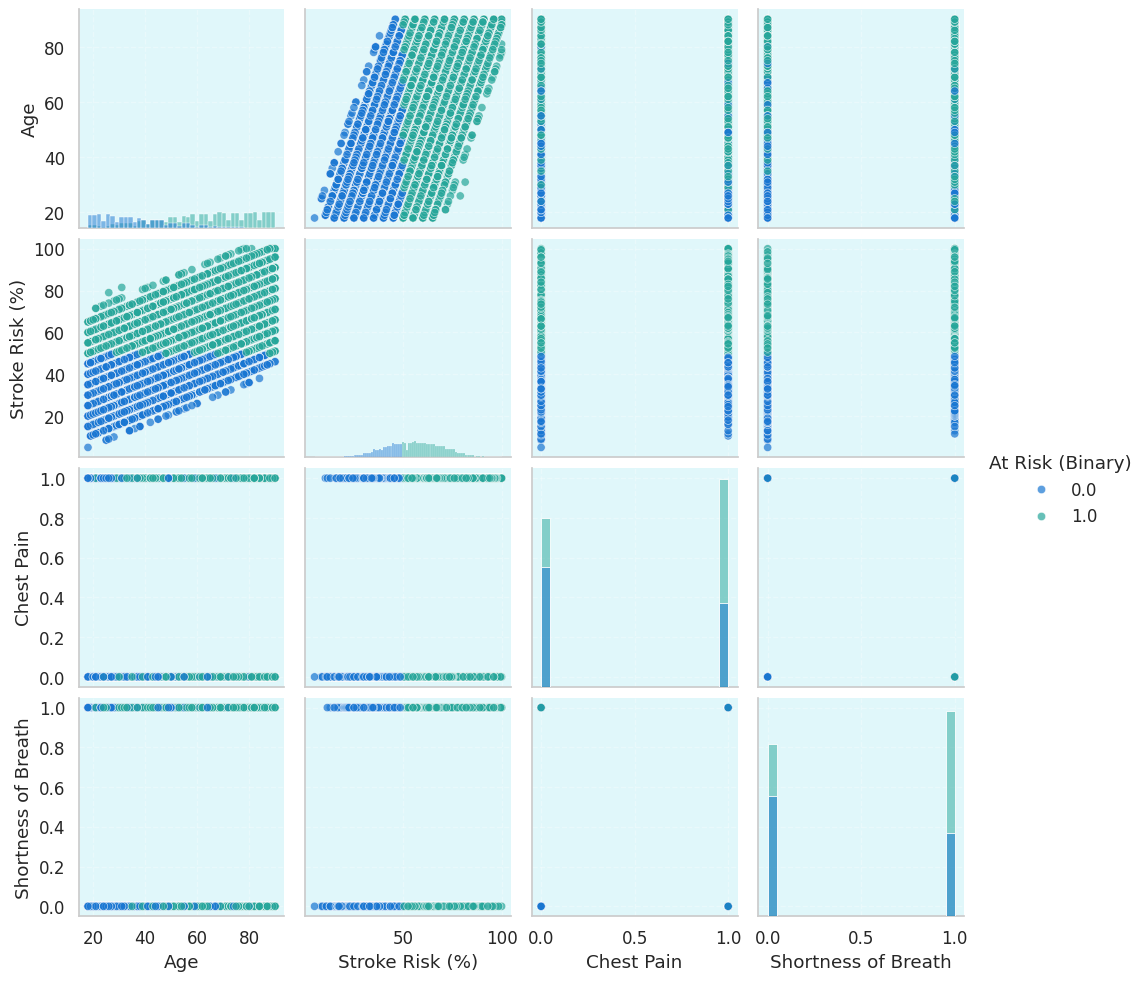

In [ ]:
subset = ['Age', 'Stroke Risk (%)', 'Chest Pain', 'Shortness of Breath', target]

palette = {0: "#1976D2", 1: "#26A69A"}
background = "#E0F7FA"

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

pairplot = sns.pairplot(
    df[subset],
    hue=target,
    diag_kind='hist',
    palette=palette,
    corner=False,
    plot_kws={'alpha': 0.7, 'edgecolor': 'white'}
)

for ax in pairplot.axes.flatten():
    if ax is not None:
        ax.set_facecolor(background)
        ax.grid(True, linestyle='--', alpha=0.3, color='white')

plt.show()


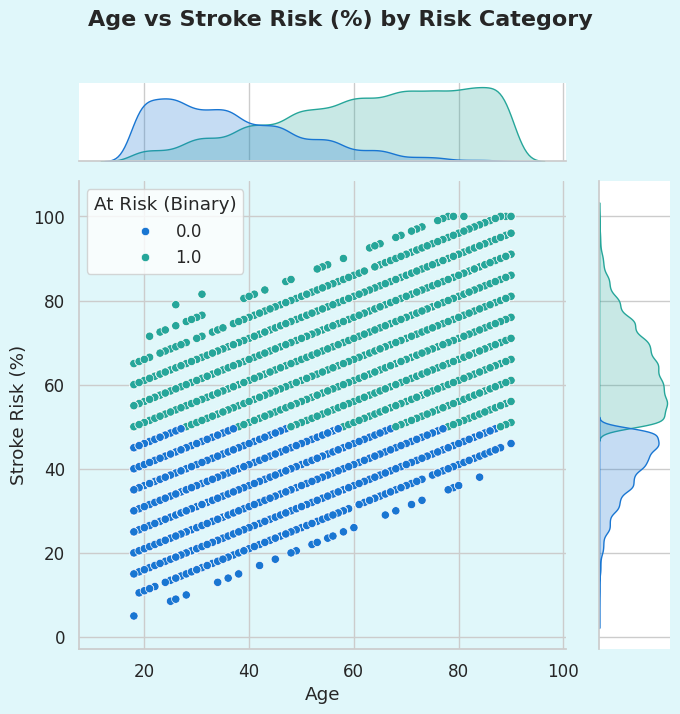

In [ ]:
palette = {0: '#1976D2', 1: '#26A69A'}

g = sns.jointplot(
    x='Age',
    y='Stroke Risk (%)',
    data=df,
    hue='At Risk (Binary)',
    palette=palette,
    kind='scatter',
    height=7
)

g.fig.set_facecolor("#E0F7FA")
g.ax_joint.set_facecolor("#E0F7FA")

g.fig.suptitle("Age vs Stroke Risk (%) by Risk Category", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


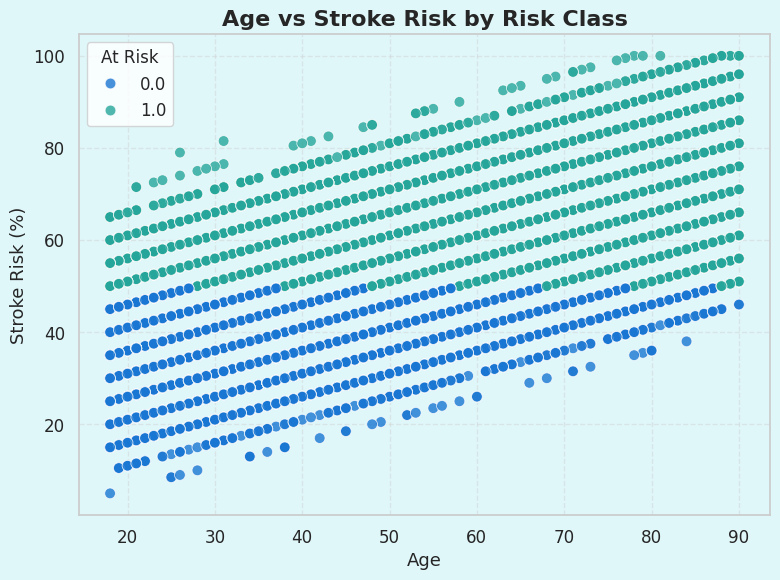

In [ ]:
plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_facecolor("#E0F7FA")
plt.gcf().set_facecolor("#E0F7FA")

sns.scatterplot(
    x='Age',
    y='Stroke Risk (%)',
    hue='At Risk (Binary)',
    palette={0: '#1976D2', 1: '#26A69A'},
    data=df,
    s=60,
    alpha=0.8
)

plt.title("Age vs Stroke Risk by Risk Class", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=13)
plt.ylabel("Stroke Risk (%)", fontsize=13)
plt.legend(title="At Risk", fontsize=12, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


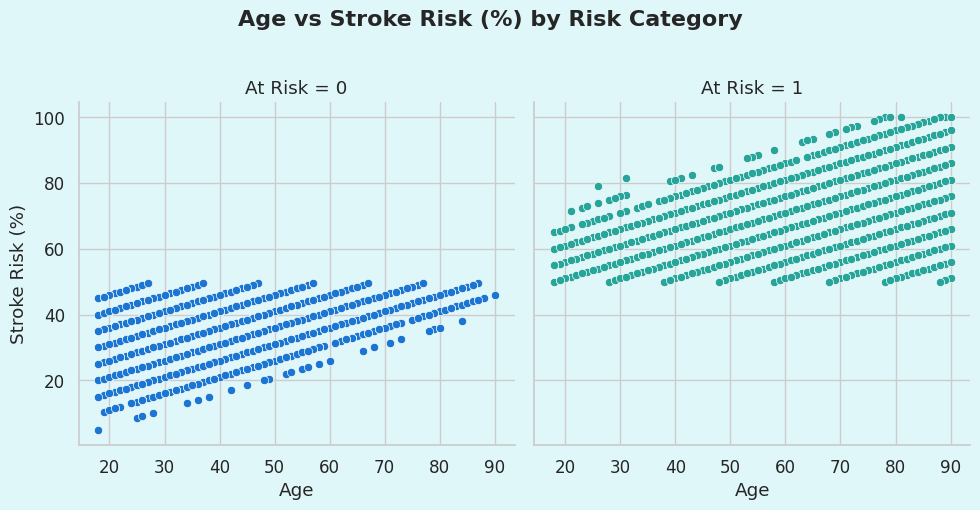

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
bg_color = "#E0F7FA"
palette = {0: '#1976D2', 1: '#26A69A'}

g = sns.FacetGrid(df, col='At Risk (Binary)', height=5, aspect=1)
for i, ax in enumerate(g.axes.flat):
    subset = df[df['At Risk (Binary)'] == i]
    sns.scatterplot(
        data=subset,
        x='Age',
        y='Stroke Risk (%)',
        color=palette[i],
        ax=ax
    )
    ax.set_facecolor(bg_color)
    ax.set_title(f'At Risk = {i}')

g.set_axis_labels("Age", "Stroke Risk (%)")
g.fig.set_facecolor(bg_color)
g.fig.suptitle("Age vs Stroke Risk (%) by Risk Category", fontsize=16, weight='bold', y=1.02)

plt.tight_layout()
plt.show()


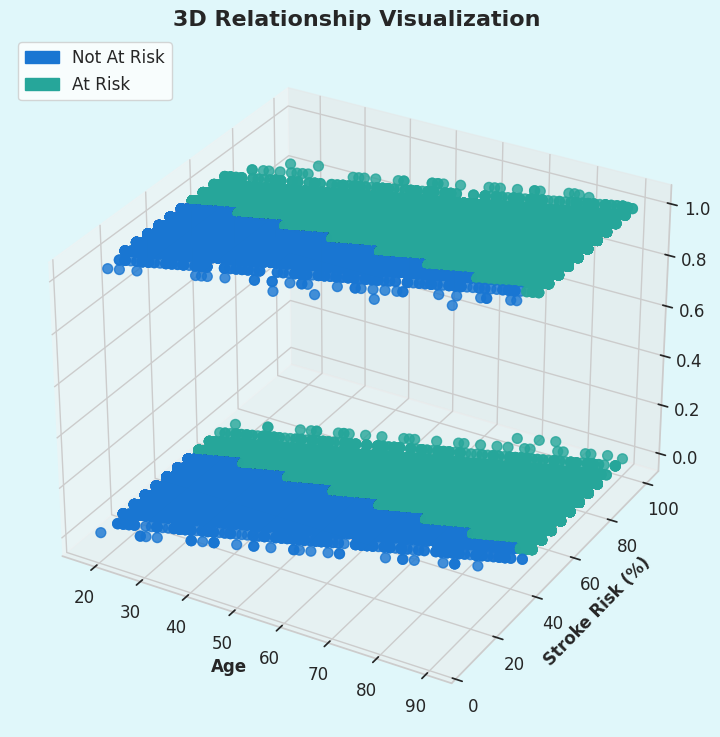

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

palette = {0: '#1976D2', 1: '#26A69A'}
colors = df['At Risk (Binary)'].map(palette)

fig = plt.figure(figsize=(11,9), facecolor="#E0F7FA")
ax = fig.add_subplot(111, projection='3d', facecolor="#E0F7FA")

sc = ax.scatter(
    df['Age'],
    df['Stroke Risk (%)'],
    df['Chest Pain'],
    c=colors,
    s=50,
    alpha=0.8
)

ax.set_xlabel('Age', fontsize=12, weight='bold')
ax.set_ylabel('Stroke Risk (%)', fontsize=12, weight='bold')

plt.title("3D Relationship Visualization", fontsize=16, weight='bold')

import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color=palette[0], label='Not At Risk'),
    mpatches.Patch(color=palette[1], label='At Risk')
]
ax.legend(handles=legend_elements, loc='upper left')

plt.show()


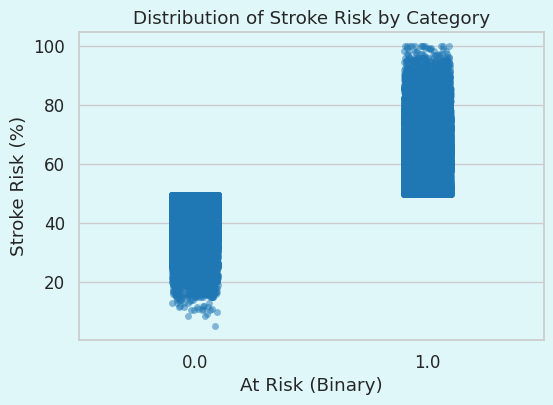

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

sns.stripplot(x='At Risk (Binary)', y='Stroke Risk (%)', data=df, jitter=True, alpha=0.5)

plt.title("Distribution of Stroke Risk by Category")
plt.show()


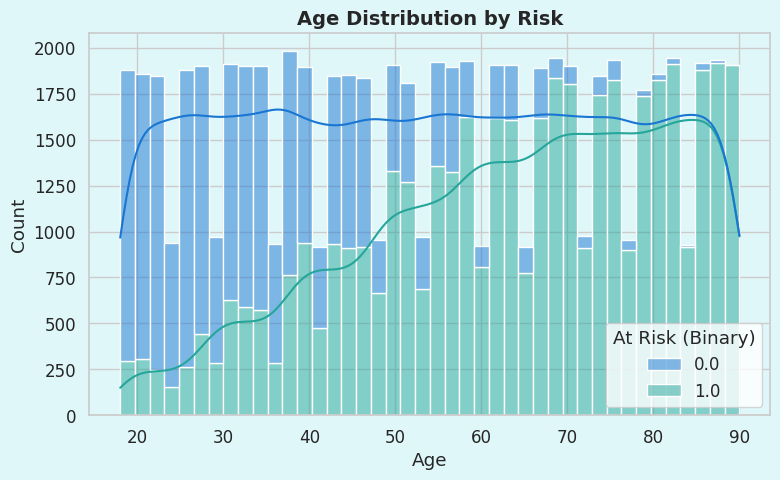

In [ ]:
plt.figure(figsize=(8,5), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

sns.histplot(
    data=df,
    x='Age',
    hue='At Risk (Binary)',
    kde=True,
    multiple='stack',
    palette={0: '#1976D2', 1: '#26A69A'}
)

plt.title("Age Distribution by Risk", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# =============================================================================
# كود لفحص الارتباط (Correlation) بشكل صحيح
# =============================================================================

# تأكد أن target_clf و features معرفان لديك
target_clf = "At Risk (Binary)"

features = [
    "Age", "Anxiety/Feeling of Doom", "Chest Discomfort (Activity)", "Chest Pain",
    "Cold Hands/Feet", "Dizziness", "Excessive Sweating", "Fatigue & Weakness",
    "High Blood Pressure", "Irregular Heartbeat", "Nausea/Vomiting",
    "Pain in Neck/Jaw/Shoulder/Back", "Persistent Cough", "Shortness of Breath",
    "Snoring/Sleep Apnea", "Swelling (Edema)"
]

# 1. إنشاء قائمة الأعمدة المطلوبة
columns_to_correlate = features + [target_clf]

# 2. حساب مصفوفة الارتباط (Correlation Matrix)
correlation_matrix = df[columns_to_correlate].corr()

# 3. اختيار عمود الارتباط للـ Target وترتيبه
correlation_with_target = correlation_matrix[target_clf].sort_values(ascending=False)

# 4. طباعة النتائج
print("\n==============================================")
print(f"📈 Correlation with: {target_clf}")
print("==============================================")
# استثناء ارتباط الهدف مع نفسه (اللي قيمته دايماً 1)
print(correlation_with_target[correlation_with_target.index != target_clf])


📈 Correlation with: At Risk (Binary)
Age                               0.611991
Cold Hands/Feet                   0.136124
Chest Pain                        0.135037
Snoring/Sleep Apnea               0.133511
Excessive Sweating                0.133266
Fatigue & Weakness                0.133082
High Blood Pressure               0.132120
Anxiety/Feeling of Doom           0.131463
Dizziness                         0.130378
Shortness of Breath               0.130091
Persistent Cough                  0.128725
Nausea/Vomiting                   0.128449
Irregular Heartbeat               0.124895
Chest Discomfort (Activity)       0.123156
Swelling (Edema)                  0.122902
Pain in Neck/Jaw/Shoulder/Back    0.120108
Name: At Risk (Binary), dtype: float64


In [ ]:
# =============================================================================
# تنظيف البيانات: إزالة الـ Outliers باستخدام طريقة IQR
# =============================================================================

# الأعمدة المراد تنظيفها
columns_to_clean = ['Age', 'Stroke Risk (%)']

# إنشاء نسخة من الـ DataFrame
df_cleaned = df.copy()

print("حجم البيانات الأصلي:", df_cleaned.shape[0])

for column in columns_to_clean:
    # حساب الـ IQR
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # تحديد حدود الـ Outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # إزالة الـ Outliers
    # يتم الإبقاء على القيم اللي بين الحد الأدنى والحد الأقصى
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    print(f"تمت إزالة {df.shape[0] - df_cleaned.shape[0]} من الـ Outliers في عمود {column}.")

print("حجم البيانات بعد التنظيف:", df_cleaned.shape[0])

حجم البيانات الأصلي: 68990
تمت إزالة 0 من الـ Outliers في عمود Age.
تمت إزالة 70 من الـ Outliers في عمود Stroke Risk (%).
حجم البيانات بعد التنظيف: 68920


In [ ]:
# =============================================================================
# فحص العلاقة بين أقوى Feature (Age) والـ Target
# =============================================================================
print("\n==============================================")
print(" 🔬 Distribution of Age by Target Class 🔬")
print("==============================================")

# حساب متوسط عمر كل مجموعة
print(df.groupby(target_clf)['Age'].describe())

# إذا كانت الأعمار بتفصل المجموعتين بشكل كامل، ده يفسر الدقة العالية


 🔬 Distribution of Age by Target Class 🔬
                    count       mean       std   min   25%   50%   75%   max
At Risk (Binary)                                                            
0.0               24199.0  36.509856  14.03126  18.0  25.0  34.0  45.0  90.0
1.0               44791.0  63.531714  17.92660  18.0  51.0  66.0  79.0  90.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# استيراد مكتبات النماذج
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# =============================================================================
# 🚨 يُفترض أن df (الـ DataFrame) الخاص ببياناتك الحقيقية مُعَرَّف ومُحمّل في هذا المكان
# =============================================================================


# =================================================================
# ✨ الخطوة 1: هندسة الخصائص (Feature Engineering) - إضافة أعمدة مركبة
# =================================================================

# 1. مؤشر الأعراض القلبية والتنفسية (الأكثر حرجاً)
df['Cardiac_Respiratory_Score'] = (
    df['Chest Pain'] +
    df['Chest Discomfort (Activity)'] +
    df['Shortness of Breath'] +
    df['Irregular Heartbeat']
)

# 2. مؤشر الأعراض العامة/الضعف (قد تشير لأمراض مزمنة)
df['General_Weakness_Score'] = (
    df['Fatigue & Weakness'] +
    df['Dizziness'] +
    df['Nausea/Vomiting'] +
    df['Excessive Sweating']
)

# 3. مؤشر أعراض الآلام المزمنة (قد تكون مرتبطة بالتهاب أو ضغط)
df['Chronic_Pain_Score'] = (
    df['Pain in Neck/Jaw/Shoulder/Back'] +
    df['Persistent Cough']
)

# 4. مؤشر الأعراض الباردة/الوذمة (قد تشير لمشاكل في الدورة الدموية)
df['Vascular_Edema_Score'] = (
    df['Swelling (Edema)'] +
    df['Cold Hands/Feet']
)


# =========================================================
# 2. تحديد المهام والبيانات (تحديث قائمة الـ Features)
# =========================================================

target_clf = "At Risk (Binary)"
target_reg = "Stroke Risk (%)"

# تحديث قائمة Features لتشمل الأعمدة الجديدة
# تم استبعاد الـ Features الفردية اللي دخلت في التركيب عشان نركز على قوة المؤشرات الجديدة
# ولكن تم الإبقاء على Age و High Blood Pressure و Snoring/Sleep Apnea كـ Features أساسية.

features = [
    "Age",
    "High Blood Pressure",
    "Snoring/Sleep Apnea",
    # الخصائص الجديدة:
    "Cardiac_Respiratory_Score",
    "General_Weakness_Score",
    "Chronic_Pain_Score",
    "Vascular_Edema_Score"
]

X = df[features]
y_clf = df[target_clf]
y_reg = df[target_reg]

# تقسيم بيانات التصنيف
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42)
# تقسيم بيانات الانحدار
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# ---------------------------------------------
# 3. قائمة النماذج المستخدمة لكل مهمة
# (النماذج لم تتغير)
# ---------------------------------------------
classification_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(random_state=42)
}

# =========================================================
# 4. وظائف التقييم
# (الوظائف لم تتغير)
# =========================================================
def evaluate_classification(models, X_train, X_test, y_train, y_test):
    print("\n" + "="*50)
    print(" 📊 CLASSIFICATION MODELS COMPARISON 📊")
    print("="*50)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"\n--- Results for: {name} ---")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

def evaluate_regression(models, X_train, X_test, y_train, y_test):
    print("\n" + "="*50)
    print(" 📈 REGRESSION MODELS COMPARISON 📈")
    print("="*50)

    error_threshold = 0.05 * y_test.mean()

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        absolute_errors = np.abs(y_test - y_pred)
        pseudo_accuracy = np.mean(absolute_errors <= error_threshold)

        print(f"\n--- Results for: {name} ---")
        print(f"R² Score: {r2:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"Pseudo-Accuracy (Error < {error_threshold:.2f}): {pseudo_accuracy:.4f}")


# =========================================================
# 5. تشغيل التقييم
# =========================================================

evaluate_classification(classification_models, X_train_c, X_test_c, y_train_c, y_test_c)

evaluate_regression(regression_models, X_train_r, X_test_r, y_train_r, y_test_r)

print("\n" + "="*50)
print("انتهت مقارنة النماذج مع Features المركبة الجديدة.")
print("="*50)


 📊 CLASSIFICATION MODELS COMPARISON 📊

--- Results for: Logistic Regression ---
Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      4814
         1.0       0.95      0.95      0.95      8984

    accuracy                           0.94     13798
   macro avg       0.93      0.93      0.93     13798
weighted avg       0.94      0.94      0.94     13798


--- Results for: Random Forest Classifier ---
Accuracy: 0.9354

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      4814
         1.0       0.95      0.95      0.95      8984

    accuracy                           0.94     13798
   macro avg       0.93      0.93      0.93     13798
weighted avg       0.94      0.94      0.94     13798



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:27:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Results for: XGBoost Classifier ---
Accuracy: 0.9353

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      4814
         1.0       0.95      0.95      0.95      8984

    accuracy                           0.94     13798
   macro avg       0.93      0.93      0.93     13798
weighted avg       0.94      0.94      0.94     13798


 📈 REGRESSION MODELS COMPARISON 📈

--- Results for: Linear Regression ---
R² Score: 0.9688
MSE: 6.3815
Pseudo-Accuracy (Error < 2.78): 0.9972

--- Results for: Random Forest Regressor ---
R² Score: 0.9556
MSE: 9.0795
Pseudo-Accuracy (Error < 2.78): 0.5547

--- Results for: Ridge Regression ---
R² Score: 0.9688
MSE: 6.3815
Pseudo-Accuracy (Error < 2.78): 0.9972

انتهت مقارنة النماذج مع Features المركبة الجديدة.


<a id="1"></a>
<p style="background-color:#5DADE2;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
Data Preparation / Feature Selection
</p>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression

# =============================================================================
# 🚨 يُفترض أن df (الـ DataFrame) يحتوي على بياناتك النظيفة والمُهندَسة (بدون Age^2)
# =============================================================================

# تحديد K=5 (5-fold Cross-Validation)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# =========================================================
# 1. تحديد الأعمدة والبيانات النهائية (Features بدون Age^2)
# =========================================================

target_clf = "At Risk (Binary)"
target_reg = "Stroke Risk (%)"

# الخصائص التي أعطت أعلى أداء لـ Logistic Regression (بدون Age^2)
features = [
    "Age",
    "High Blood Pressure",
    "Snoring/Sleep Apnea",
    "Cardiac_Respiratory_Score",
    "General_Weakness_Score",
    "Chronic_Pain_Score",
    "Vascular_Edema_Score"
]

X = df[features]
y_clf = df[target_clf]
y_reg = df[target_reg]

print("="*50)
print("🏁 بدْء التحقق المتبادل (Cross-Validation) 🏁")
print("="*50)

# =========================================================
# 2. التحقق المتبادل للتصنيف (Logistic Regression)
# =========================================================

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
clf_scores = cross_val_score(log_reg_model, X, y_clf, cv=k_fold, scoring='accuracy')

print("📊 نتائج Logistic Regression (التصنيف):")
print(f"  درجات الدقة (Accuracy) لكل طية: {clf_scores}")
print(f"  متوسط الدقة (Mean Accuracy): {clf_scores.mean():.4f}")
print(f"  الانحراف المعياري (Std Dev): {clf_scores.std():.4f}")

# =========================================================
# 3. التحقق المتبادل للانحدار (Linear Regression)
# =========================================================

lin_reg_model = LinearRegression()
reg_scores = cross_val_score(lin_reg_model, X, y_reg, cv=k_fold, scoring='r2')

print("\n📈 نتائج Linear Regression (الانحدار):")
print(f"  درجات R² لكل طية: {reg_scores}")
print(f"  متوسط R² (Mean R²): {reg_scores.mean():.4f}")
print(f"  الانحراف المعياري (Std Dev): {reg_scores.std():.4f}")

print("\n" + "="*50)
print("✅ انتهى التحقق المتبادل. ابعتلي النتائج!")
print("="*50)

🏁 بدْء التحقق المتبادل (Cross-Validation) 🏁
📊 نتائج Logistic Regression (التصنيف):
  درجات الدقة (Accuracy) لكل طية: [0.93752718 0.93897666 0.93571532 0.93890419 0.93644006]
  متوسط الدقة (Mean Accuracy): 0.9375
  الانحراف المعياري (Std Dev): 0.0013

📈 نتائج Linear Regression (الانحدار):
  درجات R² لكل طية: [0.96877712 0.96846795 0.96865996 0.96943343 0.96775419]
  متوسط R² (Mean R²): 0.9686
  الانحراف المعياري (Std Dev): 0.0005

✅ انتهى التحقق المتبادل. ابعتلي النتائج!


In [ ]:
ftrs=[]
for z in df.columns:
    if z not in  ["Age",'Stroke Risk (%)','At Risk (Binary)']:
        ftrs_nc=['Age',z]
        ftrs.append(ftrs_nc)
X = df.drop(columns=["At Risk (Binary)","Stroke Risk (%)"])
y = df["At Risk (Binary)"]

<p style="background-color:#48C9B0;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
Data Splitting / Train-Test Split
</p>



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

<p style="background-color:#5DADE2;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
Model Definition & Cross-Validation
</p>


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)}

print("\n=== Cross-Validation Results ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

    print(f"{name}: AUC = {np.mean(auc_scores):.5f} ± {np.std(auc_scores):.5f} | "
          f"F1 = {np.mean(f1_scores):.5f} ± {np.std(f1_scores):.5f}")


=== Cross-Validation Results ===
Logistic Regression: AUC = 0.99976 ± 0.00010 | F1 = 0.99763 ± 0.00044
Decision Tree: AUC = 0.95286 ± 0.00172 | F1 = 0.96680 ± 0.00098
Random Forest: AUC = 0.99472 ± 0.00036 | F1 = 0.97054 ± 0.00204


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:08] WARNING: /w

XGBoost: AUC = 0.99972 ± 0.00014 | F1 = 0.99799 ± 0.00048


/tmp/ipython-input-269985172.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = df.groupby('AgeGroup')[target].mean().reset_index()


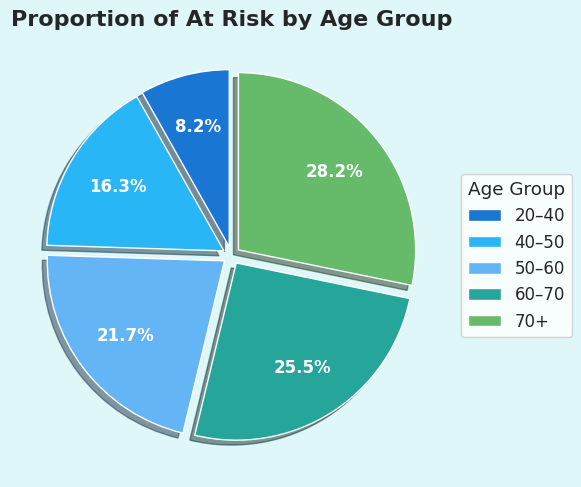

In [ ]:
import matplotlib.pyplot as plt

df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 40, 50, 60, 70, 90],
                        labels=['20–40', '40–50', '50–60', '60–70', '70+'])

risk_by_age = df.groupby('AgeGroup')[target].mean().reset_index()

# Blue–Green Palette
colors = ['#1976D2',   # Blue strong
          '#29B6F6',   # Light blue
          '#64B5F6',   # Softer blue
          '#26A69A',   # Teal
          '#66BB6A']   # Green

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(6, 6), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

wedges, texts, autotexts = plt.pie(
    risk_by_age[target],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    pctdistance=0.7,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)

plt.legend(wedges, risk_by_age['AgeGroup'], title="Age Group",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.title('Proportion of At Risk by Age Group', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


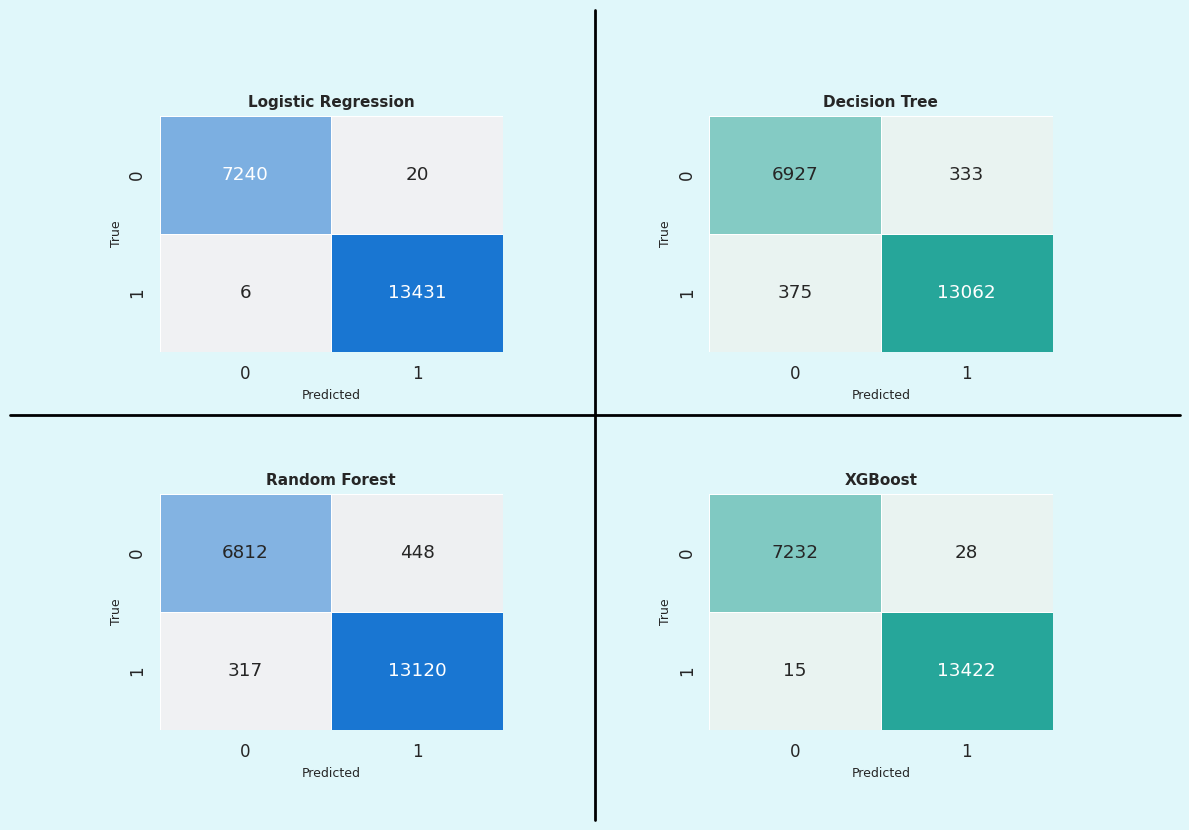

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.998744,0.998513,0.999553,0.999033,0.999801
1,Decision Tree,0.965792,0.975140,0.972092,0.973614,0.963108
2,Random Forest,0.963038,0.966981,0.976408,0.971672,0.995211
3,XGBoost,0.997922,0.997918,0.998884,0.998401,0.999783


In [ ]:
import math
from matplotlib.lines import Line2D
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score
)

background = "#E0F7FA"

cmaps = [
    sns.light_palette("#1976D2", as_cmap=True),
    sns.light_palette("#26A69A", as_cmap=True),
    sns.light_palette("#1976D2", as_cmap=True),
    sns.light_palette("#26A69A", as_cmap=True)
]

model_names      = []
accuracy_scores  = []
precision_scores = []
recall_scores    = []
f1_scores        = []
roc_auc_list     = []
conf_matrices = []
names_list    = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
        if y_scores.ndim > 1:
            y_scores = y_scores[:, 1]

    auc       = roc_auc_score(y_test, y_scores)
    f1        = f1_score(y_test, y_pred)
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    cf        = confusion_matrix(y_test, y_pred)

    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_list.append(auc)
    conf_matrices.append(cf)
    names_list.append(name)

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
fig.patch.set_facecolor(background)
axes = axes.flatten()

for idx, (cf, name) in enumerate(zip(conf_matrices, names_list)):
    ax = axes[idx]
    ax.set_facecolor(background)

    box = ax.get_position()
    ax.set_position([
        box.x0 + 0.04,
        box.y0 + 0.04,
        box.width * 0.75,
        box.height * 0.75
    ])

    sns.heatmap(
        cf, annot=True, fmt='d',
        cmap=cmaps[idx],
        cbar=False, ax=ax,
        linewidths=0.4, linecolor='white'
    )

    ax.set_title(name, fontsize=11, weight='bold')
    ax.set_xlabel("Predicted", fontsize=9)
    ax.set_ylabel("True", fontsize=9)

v_line = Line2D([0.5, 0.5], [0.05, 0.95], color='black', linewidth=2,
                transform=fig.transFigure, clip_on=False)
h_line = Line2D([0.05, 0.95], [0.5, 0.5], color='black', linewidth=2,
                transform=fig.transFigure, clip_on=False)

fig.add_artist(v_line)
fig.add_artist(h_line)

plt.show()

summary_table = pd.DataFrame({
    'Model':     model_names,
    'Accuracy':  accuracy_scores,
    'Precision': precision_scores,
    'Recall':    recall_scores,
    'F1 Score':  f1_scores,
    'AUC':       roc_auc_list
})

summary_table


/tmp/ipython-input-2958032647.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(summary_table['Model'], rotation=25, ha='right', fontsize=11)
/tmp/ipython-input-2958032647.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(summary_table['Model'], rotation=25, ha='right', fontsize=11)
/tmp/ipython-input-2958032647.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(summary_table['Model'], rotation=25, ha='right', fontsize=11)
/tmp/ipython-input-2958032647.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(summary_table['Model'], rotation=25, ha='right', fontsize=11)
/tmp/ipy

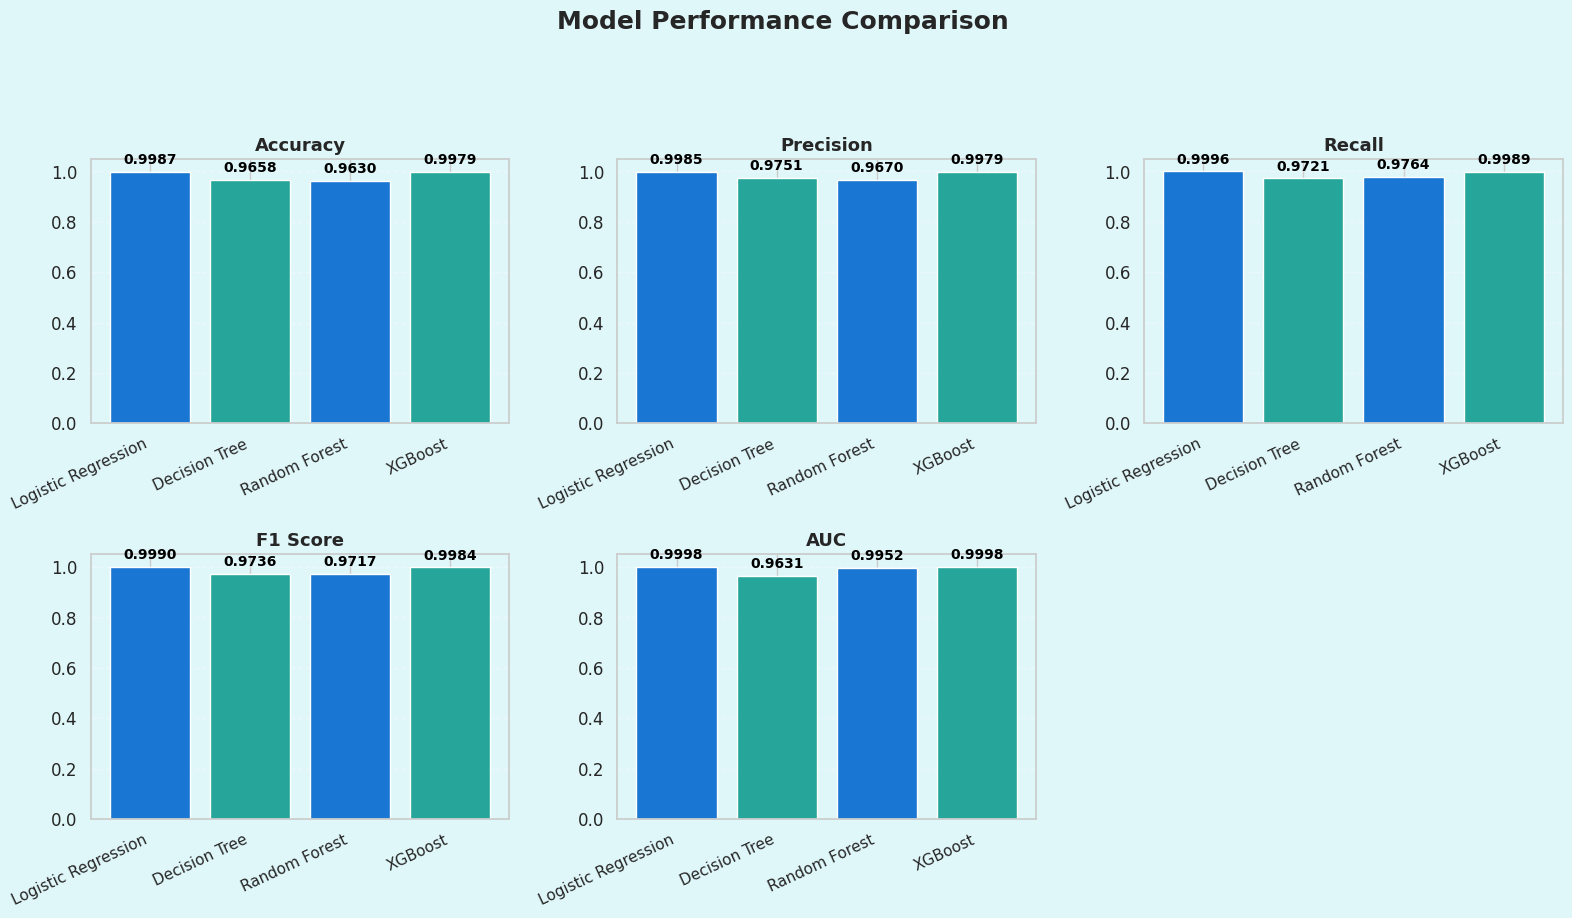

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# نفس ألوان البلو–جرين اللي بنستخدمها دايمًا
colors = ['#1976D2', '#26A69A', '#1976D2', '#26A69A']

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

fig.patch.set_facecolor("#E0F7FA")

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.set_facecolor("#E0F7FA")

    bars = ax.bar(
        summary_table['Model'],
        summary_table[metric],
        color=colors[:len(summary_table['Model'])],
        edgecolor='white'
    )

    ax.set_title(metric, fontsize=13, weight='bold')
    ax.set_ylim(0, 1.05)
    ax.set_xticklabels(summary_table['Model'], rotation=25, ha='right', fontsize=11)
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='white')

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02,
            f"{height:.4f}",
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold',
            color='black'
        )

if len(metrics) < len(axes):
    fig.delaxes(axes[-1])

fig.suptitle('Model Performance Comparison', fontsize=18, weight='bold', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


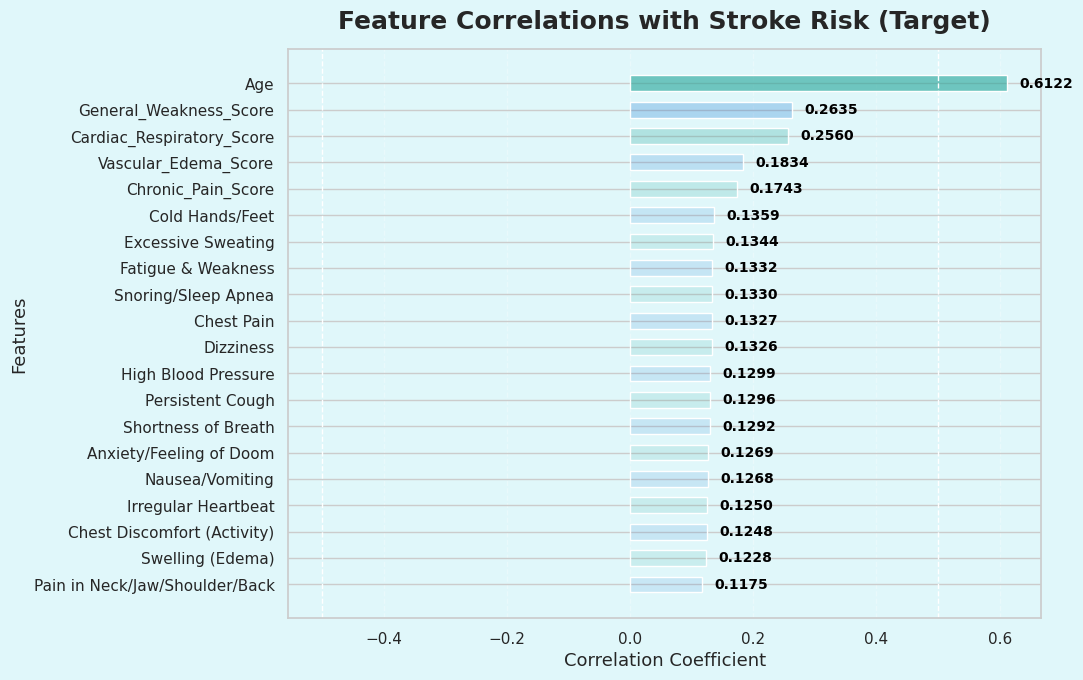

In [ ]:
# Blue–Green unified palette
palette = ['#1976D2', '#26A69A']

train_corr_df = pd.concat([X_train.copy(), y_train.rename('target')], axis=1)
corr = train_corr_df.corr(numeric_only=True)

target_corr = corr['target'].drop('target').sort_values(ascending=True)

colors = []
for i, val in enumerate(target_corr):
    base = mcolors.to_rgba(palette[i % len(palette)])  # alternate between blue & green
    colors.append((base[0], base[1], base[2], abs(val)))  # transparency = |corr|

plt.figure(figsize=(11,7), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

bars = plt.barh(
    target_corr.index,
    target_corr.values,
    color=colors,
    edgecolor='white',
    height=0.6
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.02 if width >= 0 else width - 0.02,
        bar.get_y() + bar.get_height()/2,
        f"{width:.4f}",
        ha='left' if width >= 0 else 'right',
        va='center',
        fontsize=10,
        weight='bold',
        color='black'
    )

plt.axvline(0.5, color='white', linestyle='--', linewidth=1)
plt.axvline(-0.5, color='white', linestyle='--', linewidth=1)

plt.title("Feature Correlations with Stroke Risk (Target)", fontsize=18, weight='bold', pad=15)
plt.xlabel("Correlation Coefficient", fontsize=13)
plt.ylabel("Features", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3, color='white')

plt.tight_layout()
plt.show()





/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


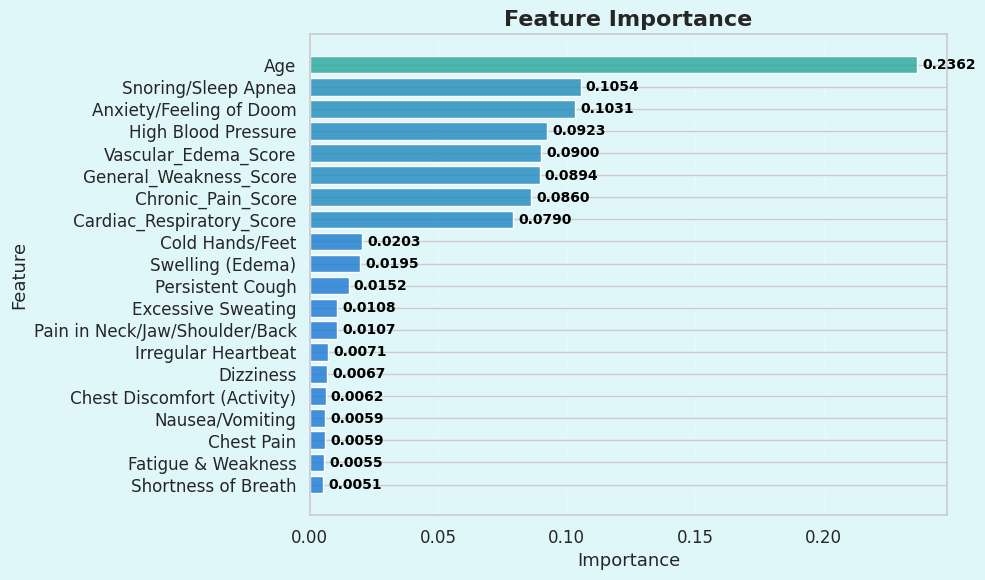

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from xgboost import XGBClassifier
import numpy as np

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# ============================
#   Blue → Green Gradient
# ============================
blue  = mcolors.to_rgb("#1976D2")
green = mcolors.to_rgb("#26A69A")

norm = mcolors.Normalize(vmin=importance_df['Importance'].min(),
                         vmax=importance_df['Importance'].max())

colors = []
for val in importance_df['Importance']:
    t = norm(val)
    color = (
        blue[0]  + (green[0] - blue[0]) * t,
        blue[1]  + (green[1] - blue[1]) * t,
        blue[2]  + (green[2] - blue[2]) * t,
        0.8  # slight transparency
    )
    colors.append(color)

plt.figure(figsize=(10,6), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

bars = plt.barh(
    importance_df['Feature'],
    importance_df['Importance'],
    color=colors,
    edgecolor='white'
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.002,
        bar.get_y() + bar.get_height()/2,
        f"{width:.4f}",
        ha='left',
        va='center',
        fontsize=10,
        weight='bold',
        color='black'
    )

plt.title('Feature Importance', fontsize=16, weight='bold')
plt.xlabel('Importance', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.3, color='white')

plt.tight_layout()
plt.show()


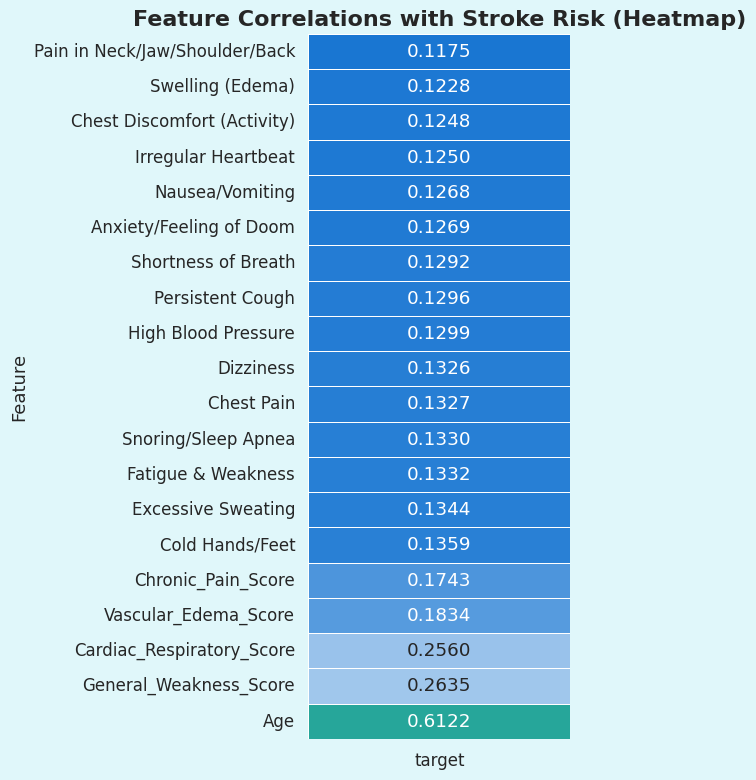

In [ ]:
plt.figure(figsize=(6,8), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

cmap = mcolors.LinearSegmentedColormap.from_list(
    "blue_green",
    ["#1976D2", "#FFFFFF", "#26A69A"]
)

sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    fmt=".4f",
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='white',
    ax=ax
)

plt.title("Feature Correlations with Stroke Risk (Heatmap)", fontsize=16, weight='bold')
plt.ylabel("Feature", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()


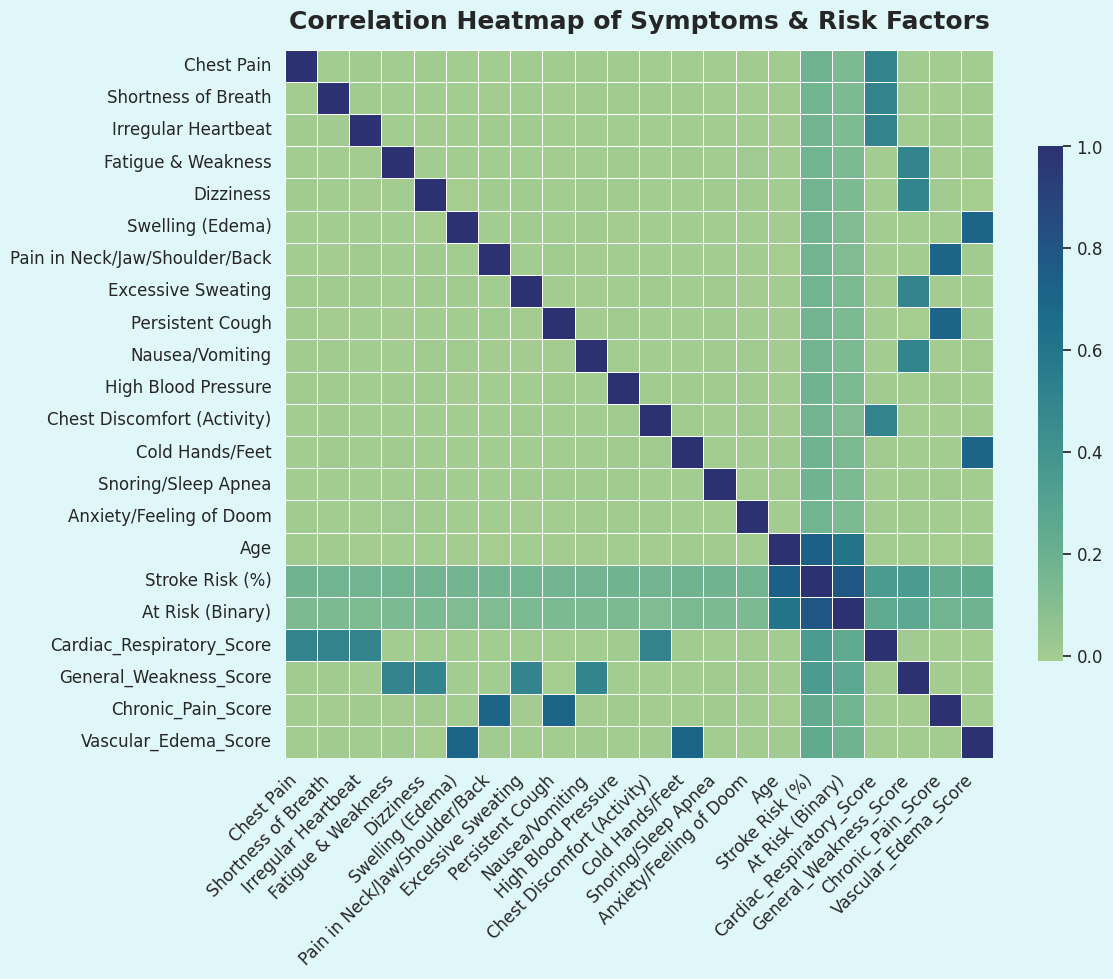

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختيار الأعمدة الرقمية وحساب correlation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()

# إنشاء الشكل والمحاور مع الخلفية المخصصة
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor("#E0F7FA")
ax.set_facecolor("#E0F7FA")

# رسم heatmap بألوان crest بدون أرقام
sns.heatmap(
    corr,
    annot=False,         # إزالة الأرقام من الخلايا
    cmap="crest",        # نفس ألوان الكود الأصلي
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink':0.7},
    ax=ax
)

# ضبط العنوان والتسميات
ax.set_title("Correlation Heatmap of Symptoms & Risk Factors", fontsize=18, weight='bold', pad=15)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:28:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


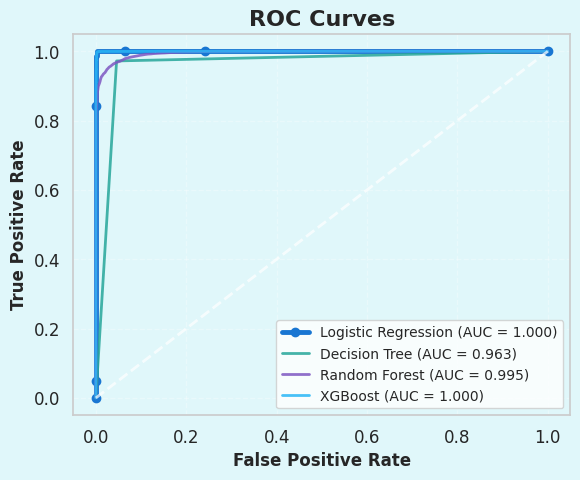

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(6, 5), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

# الباليت الأساسية
palette = ["#1976D2", "#26A69A", "#7E57C2", "#29B6F6", "#66BB6A"]

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    if name.lower() == "logistic regression":
        # إبراز اللوجستيك
        plt.plot(
            fpr, tpr,
            color="#1976D2",   # الأزرق القوي
            lw=3.5,
            marker='o',
            markevery=0.15,
            label=f'{name} (AUC = {roc_auc:.3f})'
        )
    else:
        # باقي الموديلات عادي
        plt.plot(
            fpr, tpr,
            color=palette[i % len(palette)],
            lw=2,
            alpha=0.85,
            label=f'{name} (AUC = {roc_auc:.3f})'
        )

plt.plot([0, 1], [0, 1], linestyle='--', color='white', lw=2, alpha=0.7)
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.title('ROC Curves', fontsize=16, weight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3, linestyle='--', color='white')

plt.tight_layout()
plt.show()


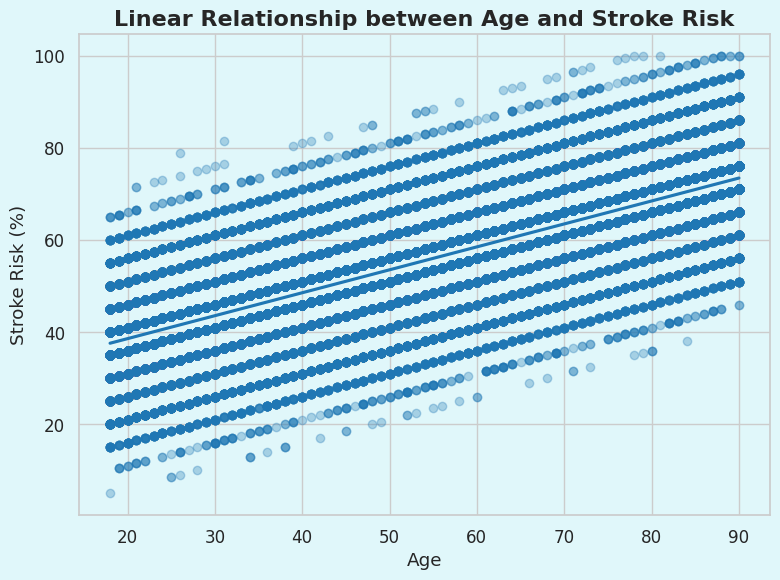

In [ ]:
plt.figure(figsize=(8,6), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")
sns.regplot(
    x='Age',
    y='Stroke Risk (%)',
    data=df,
    scatter_kws={'alpha':0.3}
)

plt.title("Linear Relationship between Age and Stroke Risk", fontsize=16, weight='bold')
plt.xlabel("Age")
plt.ylabel("Stroke Risk (%)")
plt.tight_layout()
plt.show()


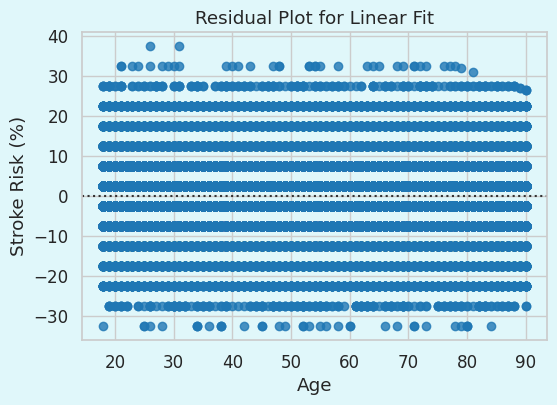

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4), facecolor="#E0F7FA")
ax = plt.gca()
ax.set_facecolor("#E0F7FA")

sns.residplot(x='Age', y='Stroke Risk (%)', data=df)

plt.title("Residual Plot for Linear Fit")
plt.show()


<p style="background-color:#48C9B0;
font-family:newtimeroman;
color:#FFF9ED;
font-size:220%;
text-align:center;
border-radius:10px;
padding:8px;
margin:0;">
End
</p>
